In [1]:
import numpy as np
import math
import random
from scipy.optimize import least_squares
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# Apply the default theme
plt.style.use('seaborn-white')
from sklearn.model_selection import train_test_split
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

In [2]:
r1data = pd.read_csv('R1blood_data_table.csv')
r1data

,Ref,B0,R1,blood source or tissue,Hct,fwatere,so2,po2,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,stefanovic and pike,1.5,0.873,Human blood,0.512,0.450025,0.42,32.830968,NaN,NaN,1.00000
1,stefanovic and pike,1.5,0.848,Human blood,0.512,0.450025,0.43,33.332357,NaN,NaN,0.00000
2,stefanovic and pike,1.5,0.839,Human blood,0.512,0.450025,0.48,35.919218,NaN,NaN,1.00000
3,stefanovic and pike,1.5,0.836,Human blood,0.512,0.450025,0.62,44.355294,NaN,NaN,0.40000
4,stefanovic and pike,1.5,0.832,Human blood,0.512,0.450025,0.66,47.303412,NaN,NaN,31.84071
...,...,...,...,...,...,...,...,...,...,...,...
161,Blockley,7.0,0.520,Human blood ex vivo,0.435,0.371568,0.64,45.787711,NaN,NaN,NaN
162,Blockley,7.0,0.520,Human blood ex vivo,0.435,0.371568,0.56,40.456899,NaN,NaN,NaN
163,Blockley,7.0,0.530,Human blood ex vivo,0.435,0.371568,0.56,40.456899,NaN,NaN,NaN
164,Blockley,7.0,0.530,Human blood ex vivo,0.435,0.371568,0.53,38.683603,NaN,NaN,NaN


In [3]:
B0=r1data.B0
np.shape(B0)

(166,)

In [4]:
y=r1data.R1
np.shape(y)

(166,)

In [5]:
fw=r1data.fwatere
np.shape(fw)

(166,)

In [6]:
po2=r1data.po2
np.shape(po2)

(166,)

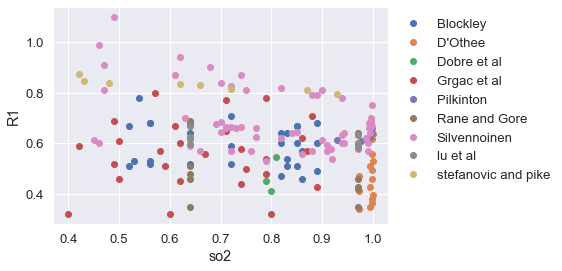

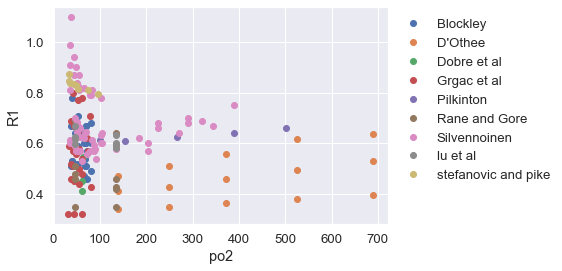

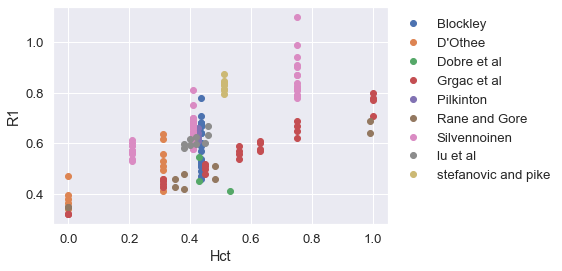

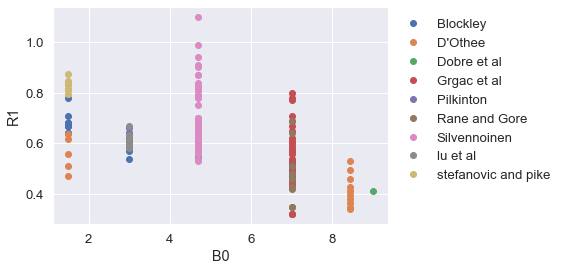

In [7]:
sns.set(font_scale=1.2)
groups = r1data.groupby('Ref')
# Plot

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.so2, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('so2')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.po2, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('po2')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Hct, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Hct')
plt.ylabel('R1')
plt.show()

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.B0, group.R1, marker='o', linestyle='', label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('B0')
plt.ylabel('R1')
plt.show()

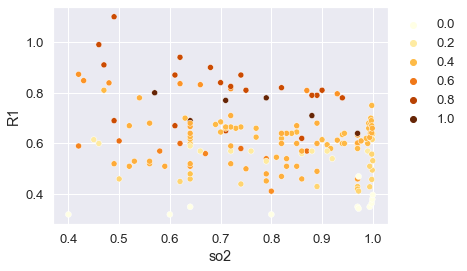

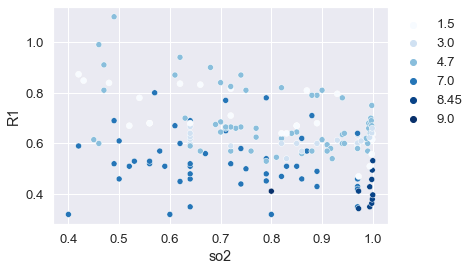

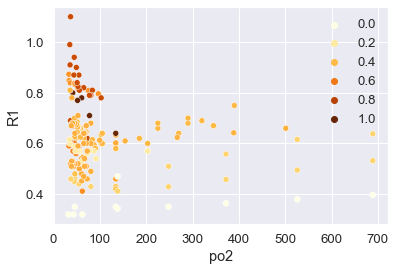

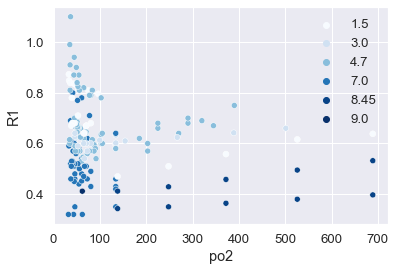

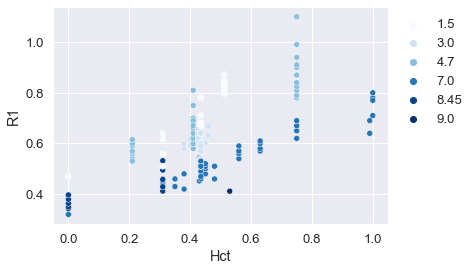

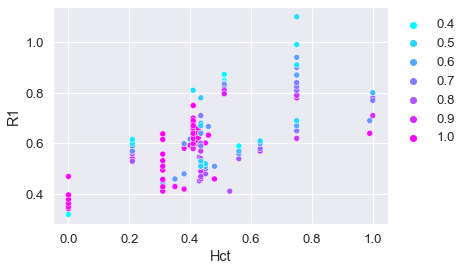

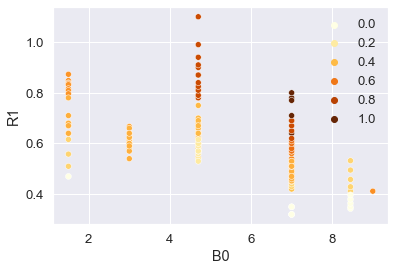

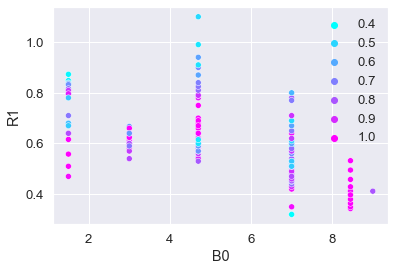

In [8]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="so2", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="so2", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="po2", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="po2", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

sns.scatterplot(x="Hct", y="R1", data=r1data, hue="B0",palette="Blues")
ax.legend(bbox_to_anchor=(1, 1))

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="Hct", y="R1", data=r1data, hue="so2",palette="cool")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="B0", y="R1", data=r1data, hue="Hct",palette="YlOrBr")
ax.legend(bbox_to_anchor=(1, 1))


fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
sns.scatterplot(x="B0", y="R1", data=r1data, hue="so2",palette="cool")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [10]:

r1vsb0data = pd.read_csv('r1vsb0data_fluids.csv')
r1vsb0data

nrepetitions=1000
nsamples=math.floor(len(r1vsb0data)*0.85)
ntest=len(r1vsb0data)-nsamples

list_of_br1pox=np.zeros(nrepetitions)
list_of_mr1pox=np.zeros(nrepetitions)
list_of_y_guess=np.zeros((nrepetitions,ntest))
list_of_y_test=np.zeros((nrepetitions,ntest))
list_of_B0_test=np.zeros((nrepetitions,ntest))


r1vsb0data = pd.read_csv('r1vsb0data_fluids.csv')
r1vsb0data

B0_alldata=r1vsb0data.B0
y_alldata=r1vsb0data.r1

B0=np.zeros(nsamples)
y=np.zeros(nsamples)


for i in range(0,nrepetitions):
    
    B0,B0_test,y,y_test = train_test_split(B0_alldata,y_alldata, test_size=0.15)


    def linear_relaxivityb0(x,y,B0):

        return x[0]+x[1]*B0-y

    x0 = np.array([1.0,1.0])
    r1vsfieldstrength = least_squares(linear_relaxivityb0, x0, args=(y,B0))

    y_guess=r1vsfieldstrength.x[0]+r1vsfieldstrength.x[1]*B0_test 


    
    list_of_y_test[i]=y_test
    list_of_y_guess[i]=y_guess
    list_of_B0_test[i]=B0_test
    
    list_of_br1pox[i] =r1vsfieldstrength.x[0]
    list_of_mr1pox[i] =r1vsfieldstrength.x[1]

In [11]:
B0_alldata=r1vsb0data.B0
y_alldata=r1vsb0data.r1

In [12]:
r1vsb0data = pd.read_csv('r1vsb0data_fluids.csv')
r1vsb0data

,Ref,B0,r1
0,Matsumoto 2006 (saline),4.7,0.000217
1,Zaharchuk 2005 (saline),1.5,0.000270
2,Pilkinton 2012 (water),3.0,0.000161
3,Simpson 2013 (vitreous),1.5,0.000347
4,Simpson 2013 (saline),1.5,0.000360
5,Zaharchuk 2006 (water),1.5,0.000249
6,Muir 2013 (34°C vitreous),3.0,0.000204
7,Muir 2013 (37°C vitreous),3.0,0.000205
8,Muir 2013 (40°C vitreous),3.0,0.000211
9,Kramer 2013 (saline),1.5,0.000282


In [13]:
br1pox_mean=np.mean(list_of_br1pox)
mr1pox_mean=np.mean(list_of_mr1pox)
br1pox_std=np.std(list_of_br1pox)
mr1pox_std=np.std(list_of_mr1pox)
print('br1poxmean =',br1pox_mean)
print('mr1poxmean =',mr1pox_mean)
print('br1poxstd =',br1pox_std)
print('mr1poxstd =',mr1pox_std)

lowerCI_br1pox = br1pox_mean - 1.96*br1pox_std
upperCI_br1pox = br1pox_mean + 1.96*br1pox_std

lowerCI_mr1pox = mr1pox_mean - 1.96*mr1pox_std
upperCI_mr1pox = mr1pox_mean + 1.96*mr1pox_std

print(lowerCI_br1pox )
print(upperCI_br1pox )

print(lowerCI_mr1pox)
print(upperCI_mr1pox)

br1poxmean = 0.0003830167246489735
mr1poxmean = -5.284213626181171e-05
br1poxstd = 2.5323923476623586e-05
mr1poxstd = 1.1272049673952267e-05
0.0003333818346347913
0.0004326516146631557
-7.493535362275815e-05
-3.074891890086527e-05


Text(0.5, 15.440000000000012, 'Distribution')

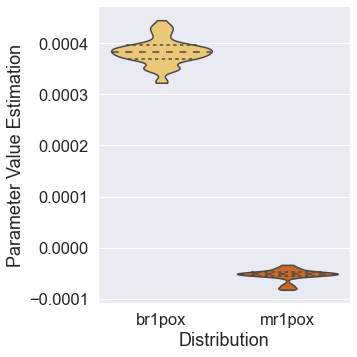

In [14]:
all_variables_o=np.array([list_of_br1pox,list_of_mr1pox])
all_variables=all_variables_o.T
np.shape(all_variables)

all_variables_df = pd.DataFrame(all_variables, columns = ['br1pox','mr1pox'])

sns.set(font_scale=1.5)
g = sns.catplot(data=all_variables_df,kind='violin',cut=0,scale='width',palette='YlOrBr',inner="quartile");
fig = matplotlib.pyplot.gcf()
plt.ylabel('Parameter Value Estimation')
plt.xlabel('Distribution')


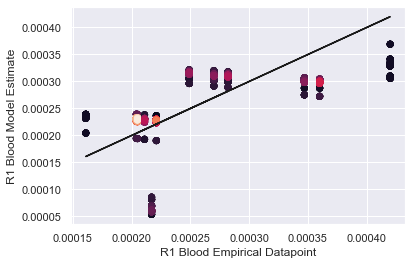

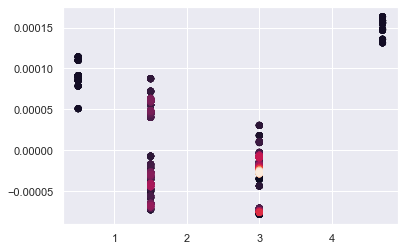

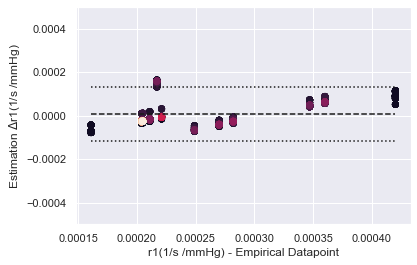

In [15]:
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    return ax

sns.set(font_scale=1)

flat_list_of_y_test=list_of_y_test.flatten()
flat_list_of_y_guess=list_of_y_guess.flatten()
flat_list_of_B0_test=list_of_B0_test.flatten()

y_error=flat_list_of_y_test-flat_list_of_y_guess
mean_R1error=np.mean(y_error)
std_R1error=np.std(y_error)

    
density_scatter(flat_list_of_y_test, flat_list_of_y_guess, bins = [50,50] )
plt.plot(flat_list_of_y_test,flat_list_of_y_test,'k')
plt.xlabel('R1 Blood Empirical Datapoint')
plt.ylabel('R1 Blood Model Estimate')

density_scatter(flat_list_of_B0_test,y_error,bins = [50,50] )
plt.show()


crude_lower_limit = mean_R1error-1.96*std_R1error
crude_upper_limit = mean_R1error+ 1.96*std_R1error

density_scatter(flat_list_of_y_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.ylim(-0.0005,0.0005)
plt.xlabel('r1(1/s /mmHg) - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$r1(1/s /mmHg)')
plt.show()

In [16]:
np.shape(flat_list_of_y_test)

(2000,)

Estimate vs True R2= 0.6117564470536692


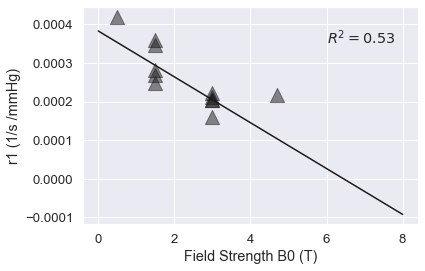

In [17]:
B0_alldata_flat=np.reshape(B0_alldata.to_numpy(),(-1, 1))
y_alldata_flat=np.reshape(y_alldata.to_numpy(),(-1, 1))


reg_v_true = LinearRegression().fit(B0_alldata_flat, y_alldata_flat)

print('Estimate vs True R2=',reg_v_true.score(B0_alldata_flat, y_alldata_flat))

sns.set(font_scale=1.2)
plt.scatter(r1vsb0data.B0,r1vsb0data.r1,s=200, c="k", alpha=0.5, marker='^')
plt.text(6,0.00035, '$R^2=0.53$')
plt.xlabel('Field Strength B0 (T)')
plt.ylabel('r1 (1/s /mmHg)')

B0_conf=np.linspace(0,9,num=9)
plt.plot(br1pox_mean+mr1pox_mean*B0_conf,'k')

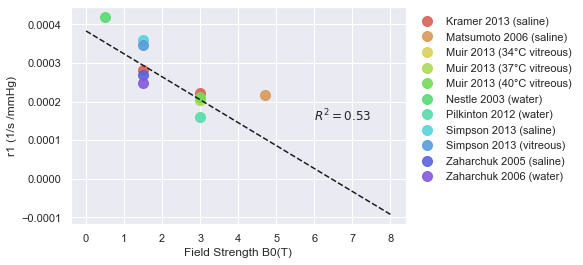

In [18]:
sns.set(font_scale=1)
sns.set_palette("hls", 14)
groups = r1vsb0data.groupby('Ref')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.B0, group.r1, marker='o',markersize=10,linestyle='',alpha=0.9, label=name)
ax.legend(bbox_to_anchor=(1, 1))
plt.xlabel('Field Strength B0(T)')
plt.ylabel('r1 (1/s /mmHg)')
plt.text(6,0.00015, '$R^2=0.53$')
B0_conf=np.linspace(0,9,num=9)
plt.plot(br1pox_mean+mr1pox_mean*B0_conf,'k',linestyle='dashed')
plt.show()

In [19]:
nrepetitions=1000
nsamples=math.floor(len(r1data)*0.9)
ntest=len(r1data)-nsamples

list_of_bR1eox=np.zeros(nrepetitions)
list_of_mR1eox=np.zeros(nrepetitions)
list_of_mr1deoxyHb=np.zeros(nrepetitions)
list_of_br1deoxyHb=np.zeros(nrepetitions)
list_of_bR1p=np.zeros(nrepetitions)
list_of_mR1p=np.zeros(nrepetitions)
list_of_y_guess=np.zeros((nrepetitions,ntest))
list_of_y_test=np.zeros((nrepetitions,ntest))
list_of_B0_test=np.zeros((nrepetitions,ntest))
list_of_po2_test=np.zeros((nrepetitions,ntest))
list_of_fw_test=np.zeros((nrepetitions,ntest))
list_of_Hct_test=np.zeros((nrepetitions,ntest))


r1data = pd.read_csv('R1blood_data_table.csv')
r1data

mr1pox=mr1pox_mean
br1pox=br1pox_mean

B0_alldata=r1data.B0
y_alldata=r1data.R1
fw_alldata=r1data.fwatere
po2_alldata=r1data.po2
Hct_alldata=r1data.Hct

B0=np.zeros(nsamples)
y=np.zeros(nsamples)
fw=np.zeros(nsamples)
po2=np.zeros(nsamples)
Hct=np.zeros(nsamples)


n=2.7
P50=37
Hb=5.15


for i in range(0,nrepetitions):
    
    B0,B0_test,y,y_test,fw,fw_test,po2,po2_test,Hct,Hct_test = train_test_split(B0_alldata,y_alldata,fw_alldata,po2_alldata,Hct_alldata, test_size=0.10)


    def R1funB0_5(x, fw, y, po2,B0):

        return fw*((x[0]+(x[1]*B0))+((x[2]+(x[3]*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n))))))+(1-fw)*((x[4]+(x[5]*B0))+((br1pox+(mr1pox*B0))*po2))-y

    x0_5 = np.array([1.0,1.0,1.0,1.0,1.0,1.0])
    res_lsq_5 = least_squares(R1funB0_5, x0_5, args=(fw,y,po2,B0))

    y_guess=fw_test*((res_lsq_5.x[0]+(res_lsq_5.x[1]*B0_test)) + ((res_lsq_5.x[2]+(res_lsq_5.x[3]*B0_test))*Hb*(1-((po2_test**n)/((po2_test**n)+(P50**n)))))) + (1-fw_test)*((res_lsq_5.x[4]+(res_lsq_5.x[5]*B0_test))+((br1pox+(mr1pox*B0_test))*po2_test))


    
    list_of_y_test[i]=y_test
    list_of_y_guess[i]=y_guess
    list_of_B0_test[i]=B0_test
    list_of_fw_test[i]=fw_test
    list_of_po2_test[i]=po2_test
    list_of_Hct_test[i]=Hct_test

    
    list_of_bR1eox[i] =res_lsq_5.x[0]
    list_of_mR1eox[i] =res_lsq_5.x[1]
    list_of_br1deoxyHb[i] =res_lsq_5.x[2]
    list_of_mr1deoxyHb[i] =res_lsq_5.x[3]
    list_of_bR1p[i] =res_lsq_5.x[4]
    list_of_mR1p[i] =res_lsq_5.x[5]
    

In [20]:


def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    return ax


flat_list_of_y_test=list_of_y_test.flatten()
flat_list_of_y_guess=list_of_y_guess.flatten()
flat_list_of_B0_test=list_of_B0_test.flatten()
flat_list_of_po2_test=list_of_po2_test.flatten()
flat_list_of_fw_test=list_of_fw_test.flatten()
flat_list_of_Hct_test=list_of_Hct_test.flatten()

y_error=flat_list_of_y_test-flat_list_of_y_guess
mean_R1error=np.mean(y_error)
std_R1error=np.std(y_error)

y_guess_reshape=np.reshape(flat_list_of_y_guess,(-1, 1))
y_test_reshape=np.reshape(flat_list_of_y_test,(-1, 1))

reg_v_true = LinearRegression().fit(y_test_reshape, y_guess_reshape)

print('Estimate vs True R2=',reg_v_true.score(y_test_reshape, y_guess_reshape))


Estimate vs True R2= 0.7910357624362688


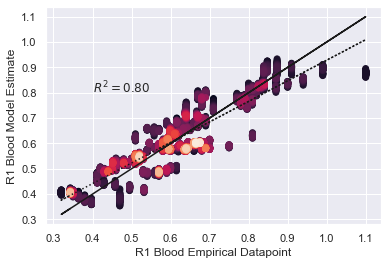

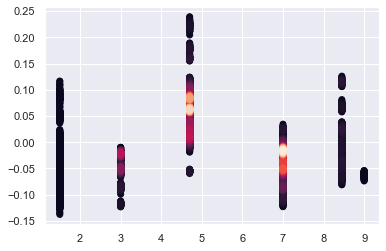

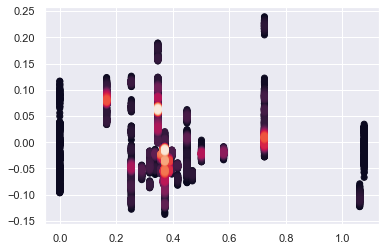

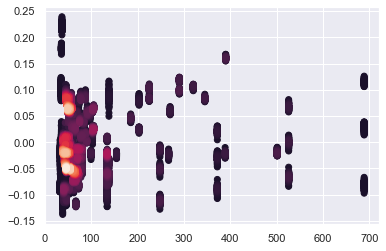

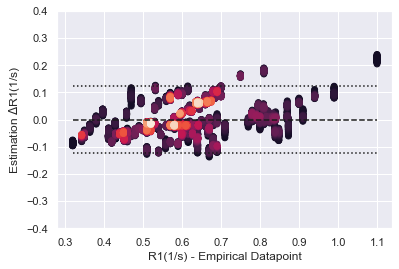

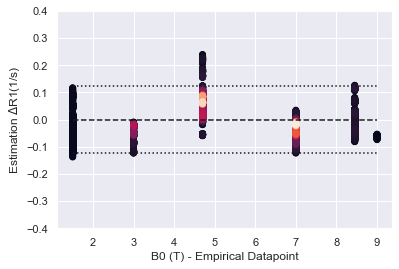

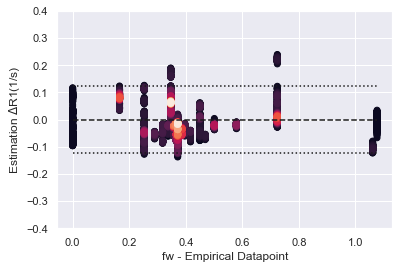

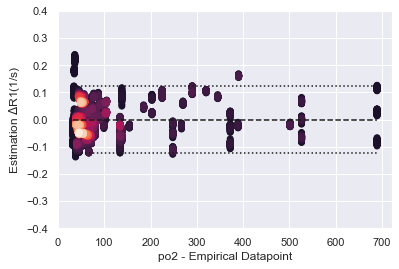

In [21]:

density_scatter(flat_list_of_y_test, flat_list_of_y_guess, bins = [50,50] )
plt.plot(flat_list_of_y_test,flat_list_of_y_test,'k')
plt.plot(y_test_reshape,np.squeeze(reg_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.text(0.4,0.8, '$R^2=0.80$')
plt.xlabel('R1 Blood Empirical Datapoint')
plt.ylabel('R1 Blood Model Estimate')

density_scatter(flat_list_of_B0_test,y_error,bins = [50,50] )
plt.show()
density_scatter(flat_list_of_fw_test,y_error,bins = [50,50])
plt.show()
density_scatter(flat_list_of_po2_test,y_error,bins = [50,50])
plt.show()


crude_lower_limit = mean_R1error-1.96*std_R1error
crude_upper_limit = mean_R1error+ 1.96*std_R1error

density_scatter(flat_list_of_y_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(list_of_y_test),np.max(list_of_y_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('R1(1/s) - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()


density_scatter(flat_list_of_B0_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_B0_test),np.max(flat_list_of_B0_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('B0 (T) - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()


density_scatter(flat_list_of_fw_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_fw_test),np.max(flat_list_of_fw_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('fw - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()

density_scatter(flat_list_of_po2_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_po2_test),np.max(flat_list_of_po2_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('po2 - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()



In [ ]:
so2_test=(flat_list_of_po2_test**n)/((flat_list_of_po2_test**n)+(P50**n))

density_scatter(so2_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(so2_test),np.max(so2_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(so2_test),np.max(so2_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(so2_test),np.max(so2_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('SO2 - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()

density_scatter(flat_list_of_Hct_test,y_error,bins = [50,50])
plt.hlines(mean_R1error,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dashed')
plt.hlines(crude_lower_limit,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dotted')
plt.hlines(crude_upper_limit,np.min(flat_list_of_Hct_test),np.max(flat_list_of_Hct_test),linestyle='dotted')
plt.ylim(-0.4,0.4)
plt.xlabel('Hct - Empirical Datapoint')
plt.ylabel('Estimation $\Delta$R1(1/s)')
plt.show()

In [ ]:
all_variables_o=np.array([list_of_bR1eox,list_of_mR1eox,list_of_br1deoxyHb, list_of_mr1deoxyHb, list_of_bR1p, list_of_mR1p])
all_variables=all_variables_o.T
np.shape(all_variables)

all_variables_df = pd.DataFrame(all_variables, columns = ['bR1eox','mR1eox','br1deoxyHb', 'mr1deoxyHb', 'bR1p', 'mR1p'])

sns.set(font_scale=1.82)
g = sns.catplot(data=all_variables_df,kind='violin',cut=0,scale='width',palette='mako_r',inner="quartile");
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 6)
plt.ylabel('Parameter Value Estimate')
plt.xlabel('Parameter Name')


In [22]:
bR1eox_mean= np.mean(list_of_bR1eox)
mR1eox_mean=np.mean(list_of_mR1eox)
mr1deoxyHb_mean=np.mean(list_of_mr1deoxyHb)
br1deoxyHb_mean=np.mean(list_of_br1deoxyHb)
bR1p_mean=np.mean(list_of_bR1p)
mR1p_mean=np.mean(list_of_mR1p)

bR1eox_std= np.std(list_of_bR1eox)
mR1eox_std=np.std(list_of_mR1eox)
mr1deoxyHb_std=np.std(list_of_mr1deoxyHb)
br1deoxyHb_std=np.std(list_of_br1deoxyHb)
bR1p_std=np.std(list_of_bR1p)
mR1p_std=np.std(list_of_mR1p)

print('bR1eox mean =',bR1eox_mean)
print('mR1eox mean =',mR1eox_mean)
print('br1deoxyHb mean =',br1deoxyHb_mean)
print('mr1deoxyHb mean =',mr1deoxyHb_mean)
print('bR1p mean =',bR1p_mean)
print('mR1p mean =',mR1p_mean)

print('bR1eox std =',bR1eox_std)
print('mR1eox std=',mR1eox_std)
print('br1deoxyHb std=',br1deoxyHb_std)
print('mr1deoxyHb std=',mr1deoxyHb_std)
print('bR1p std=',bR1p_std)
print('mR1p std=',mR1p_std)

lowerCI_bR1eox = bR1eox_mean - 1.96*bR1eox_std
upperCI_bR1eox = bR1eox_mean + 1.96*bR1eox_std

lowerCI_mR1eox = mR1eox_mean - 1.96*mR1eox_std
upperCI_mR1eox = mR1eox_mean + 1.96*mR1eox_std

lowerCI_br1deoxyHb = br1deoxyHb_mean - 1.96*br1deoxyHb_std
upperCI_br1deoxyHb = br1deoxyHb_mean + 1.96*br1deoxyHb_std

lowerCI_mr1deoxyHb = mr1deoxyHb_mean - 1.96*mr1deoxyHb_std
upperCI_mr1deoxyHb = mr1deoxyHb_mean + 1.96*mr1deoxyHb_std

lowerCI_bR1p = bR1p_mean - 1.96*bR1p_std
upperCI_bR1p = bR1p_mean + 1.96*bR1p_std

lowerCI_mR1p = mR1p_mean - 1.96*mR1p_std
upperCI_mR1p = mR1p_mean + 1.96*mR1p_std


print(lowerCI_bR1eox)
print(upperCI_bR1eox )

print(lowerCI_mR1eox)
print(upperCI_mR1eox)

print(lowerCI_br1deoxyHb)
print(upperCI_br1deoxyHb )

print(lowerCI_mr1deoxyHb)
print(upperCI_mr1deoxyHb)

print(lowerCI_bR1p)
print(upperCI_bR1p)

print(lowerCI_mR1p )
print(upperCI_mR1p)

bR1eox mean = 1.2577888495051084
mR1eox mean = -0.08056201801006714
br1deoxyHb mean = 0.15942592351179594
mr1deoxyHb mean = -0.017267224035763883
bR1p mean = 0.351033708439572
mR1p mean = 0.007464685205150326
bR1eox std = 0.02893409760304107
mR1eox std= 0.004919635573776477
br1deoxyHb std= 0.01312094953138918
mr1deoxyHb std= 0.0022537498785861272
bR1p std= 0.01518126856150145
mR1p std= 0.002202831084098556
1.201078018203148
1.3144996808070688
-0.09020450373466904
-0.07091953228546524
0.13370886243027313
0.18514298459331874
-0.02168457379779269
-0.012849874273735074
0.3212784220590291
0.38078899482011486
0.0031471362803171567
0.011782234129983495


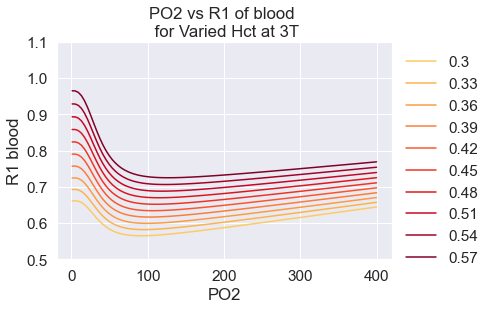

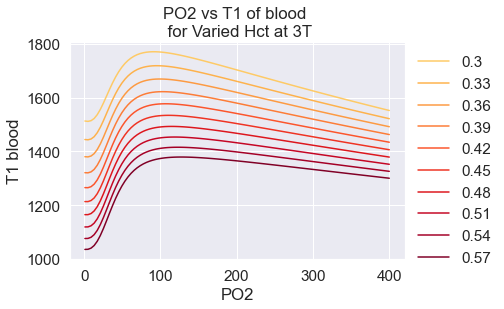

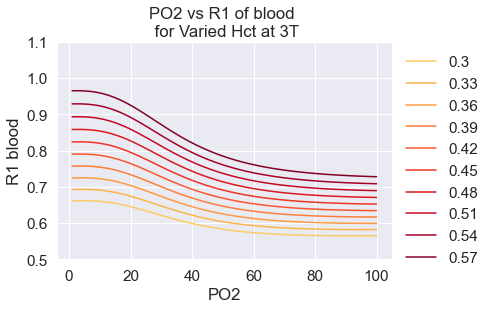

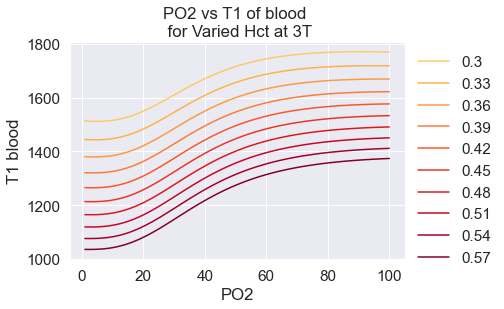

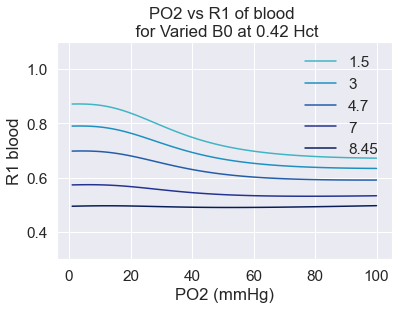

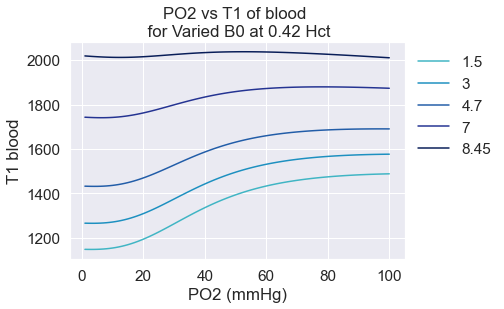

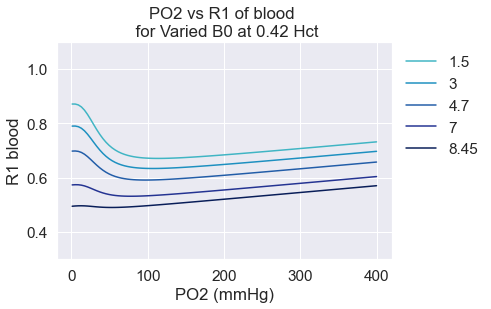

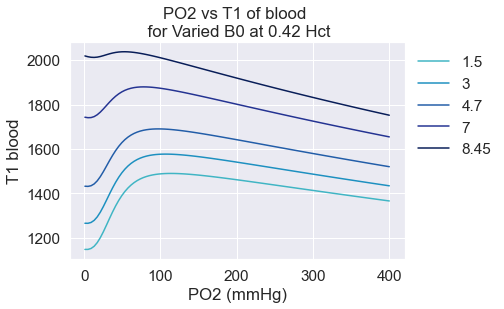

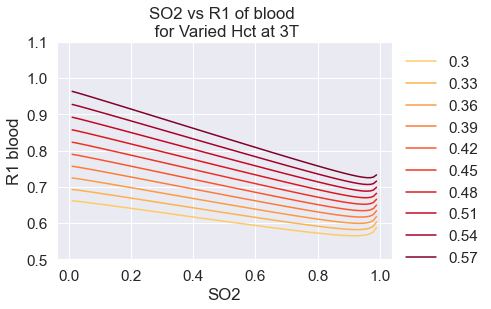

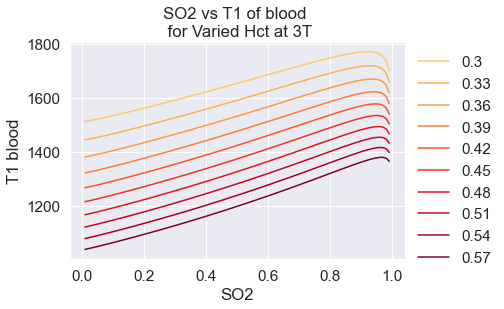

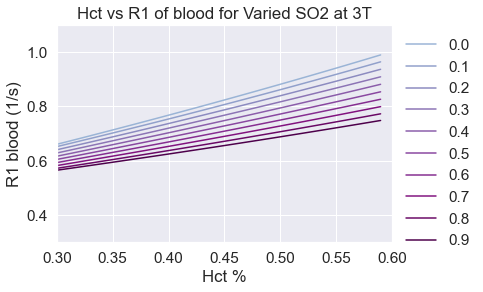

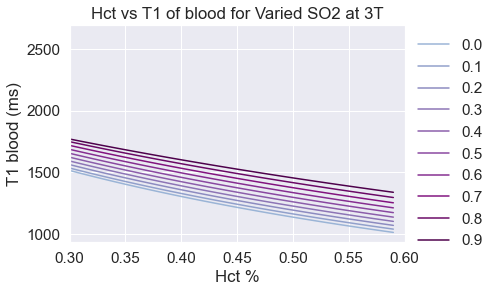

In [23]:
sns.set(font_scale=1.4)
B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
n=2.7
P50=37

po2_xaxis=np.linspace(1,400,100)
po2=po2_xaxis

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(Hct))
    plt.title('PO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('R1 blood')
    plt.ylim(0.5,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(Hct))
    plt.title('PO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))

##########################################################################################

B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
n=2.7
P50=37

po2_xaxis=np.linspace(1,100,100)
po2=po2_xaxis

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(Hct))
    plt.title('PO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('R1 blood')
    plt.ylim(0.5,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(Hct))
    plt.title('PO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('PO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################

Hb=5.15 # mmol Hb tetramer/L plasma
Hct=0.42

po2_xaxis=np.linspace(1,100,100)
po2=po2_xaxis
 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(B0))
    plt.title('PO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylim(0.3,1.1)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend()
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(B0))
    plt.title('PO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))

#################################################################################


Hb=5.15 # mmol Hb tetramer/L plasma
Hct=0.42

po2_xaxis=np.linspace(1,400,100)
po2=po2_xaxis
 

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(po2_xaxis,R1_blood,label=str(B0))
    plt.title('PO2 vs R1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylim(0.3,1.1)
    plt.ylabel('R1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in [1.5,3,4.7,7,8.45]:
    B0=x
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(po2_xaxis,T1_blood,label=str(B0))
    plt.title('PO2 vs T1 of blood \n for Varied B0 at 0.42 Hct')
    plt.xlabel('PO2 (mmHg)')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlGnBu #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.5,1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################



B0=3 # Tesla
 # from 0-1
Hb=5.15 # mmol Hb tetramer/L plasma

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(so2,R1_blood,label=str(Hct))
    plt.title('SO2 vs R1 of blood \n for Varied Hct at 3T')
    plt.xlabel('SO2')
    plt.ylabel('R1 blood')
    plt.ylim(0.5,1.1)
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))
    

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for x in range(30,60,3):
    Hct=x/100
    fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))
    so2=(np.arange(1,100))/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(so2,T1_blood,label=str(Hct))
    plt.title('SO2 vs T1 of blood \n for Varied Hct at 3T')
    plt.xlabel('SO2')
    plt.ylabel('T1 blood')
colormap = plt.cm.YlOrRd #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0.3, 1,len(ax1.lines))]
for i,j in enumerate(ax1.lines):
    j.set_color(colors[i])
plt.legend(bbox_to_anchor=(1, 1))


#################################################################################


Hb=5.15 # mmol Hb tetramer/L plasma
#print(fwatere)
B0=3

Hct=(np.arange(1,60))/100
fw=(0.7*Hct)/((0.7*Hct)+0.95*(1-Hct))

fig1 = plt.figure()
ax1 = fig1.add_subplot(111) 
for i in range(0,100,10):
    so2=i/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    plt.plot(Hct,R1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax1.lines))]
    for i,j in enumerate(ax1.lines):
        j.set_color(colors[i])
    plt.title('Hct vs R1 of blood for Varied SO2 at 3T')
    plt.xlabel('Hct %')
    plt.ylabel('R1 blood (1/s)')
    plt.xlim(0.3,0.6)
    plt.ylim(0.3,1.1)
    plt.legend(bbox_to_anchor=(1, 1))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
for i in range(0,100,10):
    so2=i/100
    po2=(-(so2*(P50**n))/(so2-1))**(1/n)
    R1_blood=fw*((bR1eox_mean+(mR1eox_mean*B0))+((br1deoxyHb_mean+(mr1deoxyHb_mean*B0))*Hb*(1-((po2**n)/((po2**n)+(P50**n)))))) + (1-fw)*((bR1p_mean+(mR1p_mean*B0))+(br1pox_mean*po2))
    T1_blood=(1/R1_blood)*1000
    plt.plot(Hct,T1_blood,label=str(so2))
    colormap = plt.cm.BuPu #nipy_spectral, Set1,Paired   
    colors = [colormap(i) for i in np.linspace(0.4, 1,len(ax2.lines))]
    for i,j in enumerate(ax2.lines):
        j.set_color(colors[i])
    plt.title('Hct vs T1 of blood for Varied SO2 at 3T')
    plt.xlabel('Hct %')
    plt.ylabel('T1 blood (ms)')
    plt.xlim(0.3,0.6)
    plt.legend(bbox_to_anchor=(1, 1))

In [24]:
r1data_normalonly = pd.read_csv('R1blood_data_table_normalonly.csv')
r1data_normalonly


bR1eox_EB=bR1eox_mean
mR1eox_EB=mR1eox_mean
br1deoxyHb_EB=br1deoxyHb_mean
mr1deoxyHb_EB=mr1deoxyHb_mean
bR1p_EB=bR1p_mean
mR1p_EB=mR1p_mean
mr1pox_EB=mr1pox_mean
br1pox_EB=br1pox_mean



bR1eox_Hales=1.10
mR1eox_Hales=-0.058
br1deoxyHb_Hales=0.033
bR1p_Hales=0.49
mR1p_Hales=-0.023


B0_test=r1data_normalonly.B0
y_test=r1data_normalonly.R1
fw_test=r1data_normalonly.fwatere
po2_test=r1data_normalonly.po2
so2_test=r1data_normalonly.so2

n=2.7
P50=37
Hb=5.15



y_guess_EB=fw_test*((bR1eox_EB+(mR1eox_EB*B0_test)) + ((br1deoxyHb_EB+(mr1deoxyHb_EB*B0_test))*Hb*(1-((po2_test**n)/((po2_test**n)+(P50**n)))))) + (1-fw_test)*((bR1p_EB+(mR1p_EB*B0_test))+((br1pox_EB+(mr1pox_EB*B0_test))*po2_test))
y_guess_Hales=fw_test*((bR1eox_Hales+(mR1eox_Hales*B0_test)) + (br1deoxyHb_Hales*Hb*(1-so2_test))) + (1-fw_test)*((bR1p_Hales+(mR1p_Hales*B0_test)))


y_guess_EB_reshape=np.reshape(y_guess_EB.to_numpy(),(-1, 1))
y_guess_Hales_reshape=np.reshape(y_guess_Hales.to_numpy(),(-1, 1))
y_test_reshape=np.reshape(y_test.to_numpy(),(-1, 1))

reg_Hales_v_true = LinearRegression().fit(y_test_reshape, y_guess_Hales_reshape)
reg_EB_v_true = LinearRegression().fit(y_test_reshape, y_guess_EB_reshape)
reg_Hales_v_EB = LinearRegression().fit(y_guess_Hales_reshape, y_guess_EB_reshape)




In [ ]:
print('Hales vs True R2=',reg_Hales_v_true.score(y_test_reshape, y_guess_Hales_reshape))
print('EB vs True R2=',reg_EB_v_true.score(y_test_reshape, y_guess_EB_reshape))
print('Hales vs EB R2=',reg_Hales_v_EB.score(y_guess_Hales_reshape, y_guess_EB_reshape))


In [ ]:
sns.set(font_scale=1.4)
density_scatter(y_test, y_guess_Hales, bins = [50,50] )
plt.plot(y_test, y_test,'k')
plt.plot(y_test,np.squeeze(reg_Hales_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.xlabel('Literature R1 Datapoint')
plt.ylabel('R1 Estimate \n Hales 2015 Model & Params')
plt.text(0.4,0.8, '$R^2=0.79$')
plt.show()

density_scatter(y_test, y_guess_EB, bins = [50,50] )
plt.plot(y_test, y_test,'k')
plt.plot(y_test,np.squeeze(reg_EB_v_true.predict(y_test_reshape)),'k',linestyle='dotted')
plt.xlabel('Literature R1 Datapoint')
plt.ylabel('R1 Estimate \n Our Model & Params')
plt.text(0.4,0.8, '$R^2=0.83$')
plt.show()

density_scatter(y_guess_Hales, y_guess_EB, bins = [50,50] )
plt.plot(y_guess_Hales, y_guess_Hales,'k')
plt.plot(y_guess_Hales,np.squeeze(reg_Hales_v_EB.predict(y_guess_Hales_reshape)),'k',linestyle='dotted')
plt.xlabel('R1 Estimate \n Hales 2015 Model & Params')
plt.ylabel('R1 Estimate \n Our Model & Params')
plt.text(0.4,0.8, '$R^2=0.96$')
plt.show()
